In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28,1)))   # 1 id to add depth for greyscale image and 3 for RGB
model.add(layers.MaxPooling2D (2, 2))
model.add(layers.Conv2D (56, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D (2, 2))
model.add(layers.Conv2D (56, (3, 3), activation = 'relu'))

model.summary()

11490434/11490434 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                         

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
model.add(layers.Flatten()) #Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10)) #mnist has 10 output classes (0-9 digits), so you use a final Dense layer with 10 outputs
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)               0

Training the model using "Adam" Optimizer

In [4]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))



Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1493 - accuracy: 0.9522 - val_loss: 0.0615 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0401 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0346 - accuracy: 0.9894 - val_loss: 0.0283 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0343 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0324 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0283 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0369 -

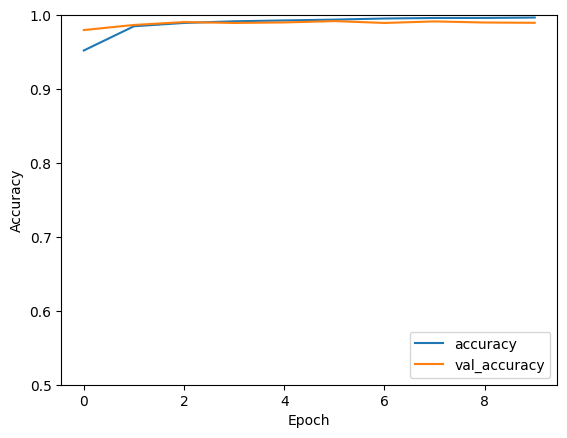

In [5]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.0374 - accuracy: 0.9896 - 4s/epoch - 14ms/step
0.9896000027656555


In [7]:
pip install opencv-python

In [9]:
import cv2
import numpy as np

custom_image = cv2.imread("/content/7 mnist.png", cv2.IMREAD_GRAYSCALE)

resized_image = cv2.resize(custom_image, (28, 28))

normalized_image = resized_image / 255.0

input_image = np.expand_dims(normalized_image, axis=(0, -1))

assert input_image.shape == (1, 28, 28, 1)

predictions = model.predict(input_image)

predicted_digit = np.argmax(predictions)

print("Predicted Digit:", predicted_digit)


1/1 [==============================] - 0s 312ms/step
Predicted Digit: 7
